# Procesamiento de lenguaje natural

Es una rama de la ciencias computacionales y la inteligencia artificial que trata con el procesamiento del *lenguaje natural* como Inglés, Español, Japonés, etc. Este procesamiento generalamente consiste en transformar lenguaje natural en datos numéricos que pueden ser utilizados por una máquina para *aprender* del mundo real. El procesamiento generalmente involucra un flujo que puede estar constituido de muchos pasos y normalmete es llamado *pipeline*.

El objetivo es diseñar software  capaz de leer y procesar lenguaje natural para completar alguna tarea específica. Para nuestro curso principalmente trabajaremos con idioma Inglés y Español. Sin embargo las técnicas que revisaremos pueden ser utilizadas para cualqiuer idioma. A continuación se enumeran algunas categrias de posibles tareas que involucran procesamiento de lenguaje natural. 

|Búsqueda| Edición|Dialogo|Mineria de texto|Análisis de Sentimiento| Email|
|---------|--------|-------|----------------|----------------------|------|
|Web|Corrección|Chatbot|Resumenes|Monitoreo de opinión|Filtrado|
|Documentos|Grámtica|Asitente|Extracción de conocimiento|Reseñas|Clasificación|
|Automcompletado|Estilo|Scheduling|Diágnostico|Atención al cliente|Priorizado|

## Un ejemplo ''antiguo''

Entre 1964 y 1966 Joseph Weizenbaum del Laboratorio de Inteligencia Artificial del MIT creo **ELIZA**, la cual puede ser considerado uno de los primeros *chatbots*. ELIZA fue diseñada para simular la conversasión con un psicoterapeuta. Un sistema de chatbot simple puede ser implementado mediante cazamiento de patrones utilizando una Máquina de Estado Finito. Es posible construir un base de conocimiento que reconozca palabras clabe y tenga respuestas predefinidas ¿Les suena a algo conocido?.

|Entrada     | Salida |
|---------   | ------ |
|Buenos dias | Buen día ¿En que puedo ayudarte?|

¿Cómo podríamos hacer que fuese un poco más general?
Utilizando expresiones regulares

|Entrada     | Salida |
|---------   | ------ |
|Buenos (patrón) | Buenas (patrón) ¿En que puedo ayudarte?|

### Chatbot basado en patrones

Una expresión regular es un clase particular de lenguaje formal que tiene un comportamiento determinista y verificable, los cuales son suficiente para modelar una amplia gama de chatbots. Incluso motores como Alexa o Google utilizan expresiones regulares. 

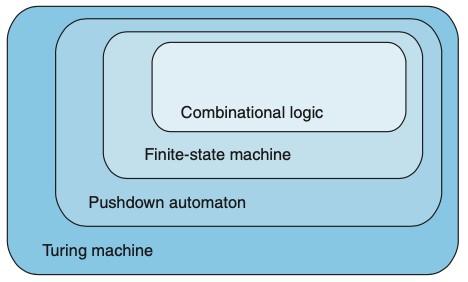
**Jerarquía lenguajes formales (Clases de Automatas)**

In [2]:
import re # Librería Expresiones regulares (lenguajes finitos)

In [21]:
r1=".*(hola|buen|buenos).*"
r2=".*(hola|buen|bueno)$"
re.match(r1, 'buenas tardes', flags=re.IGNORECASE) 

<re.Match object; span=(0, 13), match='buenas tardes'>

In [23]:
re.match(r2, 'hola, buenos días', flags=re.IGNORECASE) 

Un chatbot de este tipo requiere de una base de conicimiento y una serie de reglas para asociar patrones de entrada en respuestas de salidad. 
Los chatbots basados en patrones no son nuestro objetivo por lo que nos nos enfocaramos en ellos. 

## Otra alternativa

Si se cuenta con suficientes datos es posible utilizar un enfoque estadistico o basado en aprendizaje de máquina. Es decir si se cuenta con miles o millones de conversasiones. Un enfoque simple sería buscar en toda la base de datos por una coincidencia exacta ¿Es probable que alguien haya hecho la misma pregunta en el pasado?. Sin embargo, es muy probable que existan errores tipográficos, uso de sinonimos  por lo que podría no haber una coincidencia exacta.  


### Noción de similitud 

Se requiere de una métrica que nos permita decidir que tan similares son dos palabras o enunciados. Por ejemplo palabras tipográficamente muy distintas como **bien**  y **correcto** tienen significades similares; mientras que otras como **mal** y **mar** son muy distintas en significado pero muy similares en cuanto a tipografia.

Estamos acostumbrados al métricas enfocadas en conjuntos o númericas como Jaccard, Levenshtein o la distancias euclideana. Pero estas métricas no pueden medir correctamente la relación  entre el significado de dos palabras (cadenas de caracteres). Y a veces ignorar diferencias ortográficas que pueden no ser realmente errores tipográficos, como "mal" y "mar".

Las métricas de distancia diseñadas para secuencias y conjuntos son útiles para aplicacones PNL, como correctores ortográficos y reconocimiento de nombres propios. Por eso, usaremos estas métricas en los problemas adecuados. Sin embargo, de forma más general en muchas aplicaciones de PNL se está mas interesados en el significado del lenguaje natural que en su ortografía. 

### Representación vectorial 

Para muchas tareas de PNL  se definen métodos que transformen el texto a un nuevo espacio dónde sea posible definir similitud en términos matemáticos (usalmente un espacio vectorial). Como parte del curso en las sesiones posteriores se presentarán varias de las técnicas más ampliamente utilizadas. Por el momento utilizaremos uno de los métodos ya impelmentados como parte de scikit-learn denominado bolsa de palabras (bag-of-words).

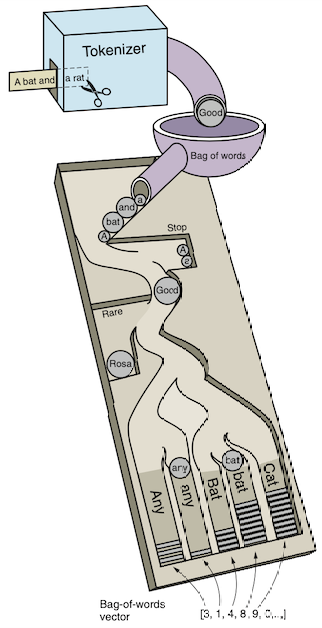
*Imagen Tomada de: Hapke, H. M., Lane, H., & Howard, C. (2019). Natural language processing in action* 


A groso modo el proceso para obtener el modelo consite en:

- Primero ser parte cada documento en términos normalizados(tokens). Una opción simple es dividir cada documento según los espacios en blanco y pasar todos los términos a minúsculas.
- Crear un vocabulario a partir de todos los tokens que se generaron a partir de todos los documentos.
- Para cada documento se verifica si las palabras del vocabulario aparecen o no. Se genera un vector, donde cada entrada indica cuántas veces aparece un término del vocabulario en el documento (en su versión más simple un valor binario, 1 si aparece al menos una vez, 0 en caso contrario).

Este método genera un representación dispersa ya que cada documento contiene solo unas pocas palabras del vocabulario, por lo que la mayoría de entradas en el vector serían ceros. Esto resulta en una representación de alta dimensionalidad. Este método se llama bolsa de palabras porque el orden de las palabras se pierde completamente (solo sabemos qué aparecen).

A continuación generaremos un modelo utilizando **scikit-learn**. Pero primero veremos brevemente como procesar archivos con la librería **Pandas**.

## Pandas

Pandas es una biblioteca de análisis de datos en Python que ayuda en la tarea de análisis y procesamiento de datos. Esta librería nos proporciona un conjuto de mecánismos para el la carga, limpieza y filtrado básico de datos. Partiendo del supuesto que ya se ha revisado la documentación y ya se cuenta con una noción básica del uso de Pandas, en el presente notebook nos enfocaremos en mostrar ejemplos de como procesar archivos CSV y JSON para realizar la carga y exploración de datos.

Para este caso consideramos que nuestra base de datos es un archivo que contiene una colección de tweets relativos a las Elecciones llevadas a cabo en México durante el año 2018.

Antes de comenzar descargamos todos los archivos necesarios:

Descargar archivo csv de https://goo.gl/SyBNex

El documento **CSV** (comma separated values) tiene un formato texto que organiza los datos por filas y columnas, donde cada registro corresponde a una fila, y los valores de los atributos a un columna. Las filas son indicadas con salto de línea y las columnas separadas por una coma (,). Por ejemplo la siguiente tabla:

id | Nombre | Apellido |Año de Nacimiento
-- | -- | -- | -- 
0  | Juan   | Rulfo| 1917
1  | Pablo  | Neruda| 1904
2  | Ernesto| Sabato| 1911

resultaria en el siguiente texto:

<p><i>
id,Nombre,Apellido,Año de Nacimiento<br />
0,Juan,Rulfo,1917<br />
1,Pablo,Neruda,1904<br />
2,Enesto,Sabato,1911
</i></p>

Ahora revisemos archivo en formato CSV que contiene los tweets relativos a la elección presidencial de 2018.

In [27]:
# Veamos la estructura del la infomación
# (esto es un comando de la terminal, no de python
# es muy probable que solo funcine en Linux o MAC)
!head -3 dominio-elecciones18.csv

,_amlo,_anaya,_bronco,_margarita,_meade,coordinates,country_code,created_at,id,place,text
637402,1,0,0,0,0,"[-92.9164995, 18.021959500000001]",MX,2018-06-01 00:00:01,1002338945395580928,"Centro, Tabasco",@Arjisa @lopezobrador_ Amén
637403,0,0,0,0,1,"[-102.5580375, 23.625418499999999]",MX,2018-06-01 00:00:11,1002338986227007488,Mexico,@Mboe55 @ncv_Violeta @galvanochoa @julioastillero @AlbaniaOC @oskar2687 @eloycam2012 @Alberto_AvalosH @FPR_Mx @saboteamos @consejuridica @cghUNAM @mikeblanco1 POR ESTAS RATAS ESTAMOS  JODIDOS  EN MEXICO SOCIOS DE SALINAS  MEADE PENA ESTUPIDO FOX  CALDERON...SOLOS ESE STAN AHORCANDO..PENDEJOS. @LaCronicaDeHoy    @ELOCCIDENTAL   @soldezacatecas   @ntrzacatecas   @MilenioJalisco   @revistaproceso


Vemos que los datos son delimitados por ",". Por lo que podemos cargalos como sigue:

In [29]:
import pandas as pd #importamos pandas solo la primera vez
data=pd.read_csv("dominio-elecciones18.csv",delimiter=',',index_col=0) 
data.head(5)

,_amlo,_anaya,_bronco,_margarita,_meade,coordinates,country_code,created_at,id,place,text
637402,1,0,0,0,0,"[-92.9164995, 18.021959500000001]",MX,2018-06-01 00:00:01,1002338945395580928,"Centro, Tabasco",@Arjisa @lopezobrador_ Amén
637403,0,0,0,0,1,"[-102.5580375, 23.625418499999999]",MX,2018-06-01 00:00:11,1002338986227007488,Mexico,@Mboe55 @ncv_Violeta @galvanochoa @julioastill...
637404,0,1,0,0,0,"[-73.723025000000007, 45.557830499999994]",CA,2018-06-01 00:00:51,1002339154351575040,"Montréal, Québec","@RicardoAnayaC Ya siéntese, señor 🤦🏻‍♂️."
637405,1,0,0,0,0,"[-109.10372649999999, 25.921946500000004]",MX,2018-06-01 00:00:56,1002339173427269633,"Ahome, Sinaloa",@Oscarinrop @ChairoMexicano @lopezobrador_ Vie...
637406,1,0,0,0,0,"[-3.7035075000000002, 40.477794500000002]",ES,2018-06-01 00:01:17,1002339263411679232,"Madrid, España",ES-DESK — Propone AMLO mantener las leyes apro...


Lo que obtenemos es un dataframe: *Two-dimensional size-mutable, potentially heterogeneous tabular data structure with labeled axes (rows and columns). Arithmetic operations align on both row and column labels. Can be thought of as a dict-like container for Series objects. The primary pandas data structure* (documentacion de pandas) 

In [30]:
# Comprobamos los tipos de datos de la columnas
data.dtypes

_amlo            int64
_anaya           int64
_bronco          int64
_margarita       int64
_meade           int64
coordinates     object
country_code    object
created_at      object
id               int64
place           object
text            object
dtype: object

Podemos ver que la columna created_at es un objeto, pero sería deseable que sea un tipo date. Pandas permite decirle que campos deberían ser parseado como fechas mediante **parse_dates**.

In [34]:
data=pd.read_csv("dominio-elecciones18.csv",delimiter=','
                 ,parse_dates=['created_at'],index_col=['created_at'],
                 #index_col=0
                ) 
data.head(2)

,Unnamed: 0,_amlo,_anaya,_bronco,_margarita,_meade,coordinates,country_code,id,place,text
created_at,,,,,,,,,,,
2018-06-01 00:00:01,637402,1,0,0,0,0,"[-92.9164995, 18.021959500000001]",MX,1002338945395580928,"Centro, Tabasco",@Arjisa @lopezobrador_ Amén
2018-06-01 00:00:11,637403,0,0,0,0,1,"[-102.5580375, 23.625418499999999]",MX,1002338986227007488,Mexico,@Mboe55 @ncv_Violeta @galvanochoa @julioastill...


In [35]:
data.dtypes

Unnamed: 0       int64
_amlo            int64
_anaya           int64
_bronco          int64
_margarita       int64
_meade           int64
coordinates     object
country_code    object
id               int64
place           object
text            object
dtype: object

In [36]:
# Podemos ver la información general del dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10000 entries, 2018-06-01 00:00:01 to 2018-06-04 20:31:39
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    10000 non-null  int64 
 1   _amlo         10000 non-null  int64 
 2   _anaya        10000 non-null  int64 
 3   _bronco       10000 non-null  int64 
 4   _margarita    10000 non-null  int64 
 5   _meade        10000 non-null  int64 
 6   coordinates   10000 non-null  object
 7   country_code  10000 non-null  object
 8   id            10000 non-null  int64 
 9   place         10000 non-null  object
 10  text          10000 non-null  object
dtypes: int64(7), object(4)
memory usage: 937.5+ KB


En una dataframe pueden convivir datos de tipo diferente en diferentes columnas: en nuestro caso, fechas, enteros y strings . El que un dato sea de tipo fecha y no un string u otra cosa, nos permite obtener información como el día de la semana de manera directa:

In [37]:
data.index.dayofweek

Int64Index([4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
            ...
            0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
           dtype='int64', name='created_at', length=10000)

## Accediendo a los datos 

### Columnas

Tenemos dos formas de acceder a las columnas: **por nombre** o **por atributo** (si no contienen espacios ni caracteres especiales).


In [38]:
# Accediendo como nombre
data['text'].head(3)

created_at
2018-06-01 00:00:01                          @Arjisa @lopezobrador_ Amén
2018-06-01 00:00:11    @Mboe55 @ncv_Violeta @galvanochoa @julioastill...
2018-06-01 00:00:51             @RicardoAnayaC Ya siéntese, señor 🤦🏻‍♂️.
Name: text, dtype: object

In [40]:
# Accediendo como atributo
data.text.head(3)

created_at
2018-06-01 00:00:01                          @Arjisa @lopezobrador_ Amén
2018-06-01 00:00:11    @Mboe55 @ncv_Violeta @galvanochoa @julioastill...
2018-06-01 00:00:51             @RicardoAnayaC Ya siéntese, señor 🤦🏻‍♂️.
Name: text, dtype: object

In [41]:
# Accediendo a varias columnas a la vez
data[['text', 'country_code','id']].head()

,text,country_code,id
created_at,,,
2018-06-01 00:00:01,@Arjisa @lopezobrador_ Amén,MX,1002338945395580928
2018-06-01 00:00:11,@Mboe55 @ncv_Violeta @galvanochoa @julioastill...,MX,1002338986227007488
2018-06-01 00:00:51,"@RicardoAnayaC Ya siéntese, señor 🤦🏻‍♂️.",CA,1002339154351575040
2018-06-01 00:00:56,@Oscarinrop @ChairoMexicano @lopezobrador_ Vie...,MX,1002339173427269633
2018-06-01 00:01:17,ES-DESK — Propone AMLO mantener las leyes apro...,ES,1002339263411679232


Del mismo modo que accedmos, podemos operar con ellos:

In [42]:
data[['_amlo', '_meade']].head()/10

,_amlo,_meade
created_at,,
2018-06-01 00:00:01,0.1,0.0
2018-06-01 00:00:11,0.0,0.1
2018-06-01 00:00:51,0.0,0.0
2018-06-01 00:00:56,0.1,0.0
2018-06-01 00:01:17,0.1,0.0


In [43]:
data[['country_code']].head()+"_XX"

,country_code
created_at,
2018-06-01 00:00:01,MX_XX
2018-06-01 00:00:11,MX_XX
2018-06-01 00:00:51,CA_XX
2018-06-01 00:00:56,MX_XX
2018-06-01 00:01:17,ES_XX


In [44]:
# Aplicando una función a una columna entera (ej. media numpy)
import numpy as np
print("Media calculada con Numpy:", np.mean(data._meade))
# Calculando la media con pandas
print("Media calculada con las funciones en pandas:", data._meade.mean())

Media calculada con Numpy: 0.3001
Media calculada con las funciones en pandas: 0.3001


### Filas
Para acceder a las filas tenemos dos métodos: `.loc` (basado en etiquetas), `.iloc` (basado en posiciones enteras).

In [45]:
# Accediendo a una fila por índice
data.iloc[1]

Unnamed: 0                                                 637403
_amlo                                                           0
_anaya                                                          0
_bronco                                                         0
_margarita                                                      0
_meade                                                          1
coordinates                    [-102.5580375, 23.625418499999999]
country_code                                                   MX
id                                            1002338986227007488
place                                                      Mexico
text            @Mboe55 @ncv_Violeta @galvanochoa @julioastill...
Name: 2018-06-01 00:00:11, dtype: object

In [47]:
# Accediendo a  filas por etiqueta
len(data.loc["2018-06-01"])

2630

In [51]:
data.loc["2018-06-01 02:00":"2018-06-01 02:03"]["text"] # tres minutos de tweets

created_at
2018-06-01 02:00:11    ¡Yo votaré por @JoseAMeadeK para #PresidenteDe...
2018-06-01 02:00:30    @castellanosfer Jajajaja seguis vos salado toy...
2018-06-01 02:01:20    @RicardoAnayaC Se debe hacer 1 spot, de abuelo...
2018-06-01 02:01:35    @Reporte_Indigo @lopezobrador_ Los seguidores ...
2018-06-01 02:01:42    Las #mujeres #campesinas estamos listas con @J...
2018-06-01 02:01:44    @yeidckol @lopezobrador_ @DrCarlosLomeli Oigan...
2018-06-01 02:01:44    Ya veo que este temporada de calor es plan de ...
2018-06-01 02:02:24    Está clarísimo:  Parte importante del empresar...
2018-06-01 02:03:29    Krauze, intelectual orgánico del neoliberalism...
2018-06-01 02:03:36    #JuntosHaremosHistoria con @MaraLezama  y @lop...
2018-06-01 02:03:45    Fox, Calderón y empresarios negociaron que AML...
2018-06-01 02:03:58    Hoy escuche en la calle una canción repugnante...
Name: text, dtype: object

### Filtrando los datos 
También puedo indezar utilizando arrays de valores booleanos, por ejemplo procedentes de la comprobación de una condición:

In [53]:
# Comprobando que registros carecen de datos válidos
data.coordinates.isnull().head()

created_at
2018-06-01 00:00:01    False
2018-06-01 00:00:11    False
2018-06-01 00:00:51    False
2018-06-01 00:00:56    False
2018-06-01 00:01:17    False
Name: coordinates, dtype: bool

In [54]:
# Accediendo a los registros que cumplen una condición
data.loc[data.coordinates.isnull()]

,Unnamed: 0,_amlo,_anaya,_bronco,_margarita,_meade,coordinates,country_code,id,place,text
created_at,,,,,,,,,,,


In [55]:
# Tweets que hablan del bronco
len(data[data._bronco==1])

307

### Agregando columnas

In [56]:
# Agruparemos por día, hora y minuto: creamos tres columnas nuevas
data['day'] = data.index.day
data['hour'] = data.index.hour
data['minute'] = data.index.minute

### Creando agrupaciones 

En muchas ocasiones queremos realizar agrupaciones de datos en base a determinados valores como son fechas, o etiquetas (por ejemplo, datos que pertenecen a un mismo ensayo o lugar)

Podemos agrupar nuestros datos utilizando `groupby`:

In [57]:
# Creamos la agrupación
daily = data.groupby(by=['day', 'hour'])
hourly = data.groupby(by=['hour','minute'])

In [58]:
# Podemos ver los grupos que se han creado
list(daily.groups.keys())[:10]

[(1, 0),
 (1, 1),
 (1, 2),
 (1, 3),
 (1, 4),
 (1, 5),
 (1, 6),
 (1, 7),
 (1, 8),
 (1, 9)]

In [59]:
list(hourly.groups.keys())[:10]

[(0, 0),
 (0, 1),
 (0, 2),
 (0, 3),
 (0, 4),
 (0, 5),
 (0, 6),
 (0, 7),
 (0, 8),
 (0, 9)]

Con estos grupos podemos hacer hacer varias cosas:

* Acceder a sus datos individualmente (por ejemplo, comprobar qué pasó cada hora del día 24) 
* Realizar una reducción de datos, para comparar diversos grupos (por, ejemplo caracterizar el tiempo de cada día a lo largo de la semana)

In [60]:
#filtrar por columnas de texto
len(data[data.text.str.contains('bronco')])

26

###  Plotting

Pandas cuenta con algunas funciones de graficación. Por ejemplo podemos graficar el histrogram para el número de tweets proveneintes de los diferentes paises:

<AxesSubplot:>

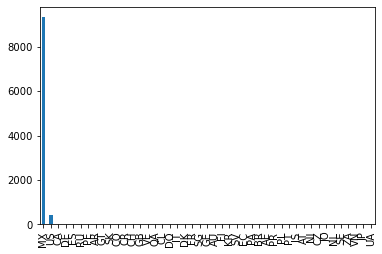

In [61]:
data.country_code.value_counts().plot(kind='bar')

#Sólo para los provenientes de US y México
data[(data.country_code=='US') | (data.country_code=='MX')].country_code.value_counts().plot(kind='bar')

<AxesSubplot:>

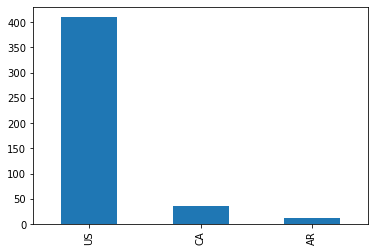

In [63]:
data[(data.country_code=='CA')|(data.country_code=='AR')|(data.country_code=='US')].country_code.value_counts().plot(kind='bar')

### Guardar dataframes

Podemos guardar los dataframes en formato CSV y JSON usando simplemente los métodos **to_csv** y **to_json**.

In [64]:
# guardar el dataframe obtenido del json normalizado en formato csv
#dataj.to_csv('my_data_frame.csv')

### Ahora si el modelo de bolsa de palabras

A continuación generaremos un modelo utilizando **scikit-learn**


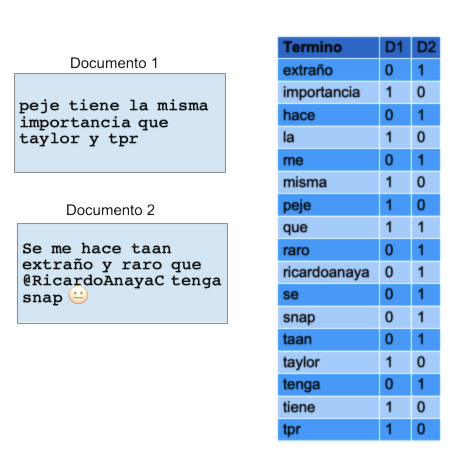

In [65]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()

In [71]:
X=data.text # Nos interesa solo el texto

In [74]:
vectorizer.fit(X)

CountVectorizer()

In [70]:
data.text

created_at
2018-06-01 00:00:01                          @Arjisa @lopezobrador_ Amén
2018-06-01 00:00:11    @Mboe55 @ncv_Violeta @galvanochoa @julioastill...
2018-06-01 00:00:51             @RicardoAnayaC Ya siéntese, señor 🤦🏻‍♂️.
2018-06-01 00:00:56    @Oscarinrop @ChairoMexicano @lopezobrador_ Vie...
2018-06-01 00:01:17    ES-DESK — Propone AMLO mantener las leyes apro...
                                             ...                        
2018-06-04 20:31:23    - @lopezobrador_ ya está pensando en someterse...
2018-06-04 20:31:28    @VicenteFoxQue @yeidckol @lopezobrador_ Y el B...
2018-06-04 20:31:30    @OrgulloMorena @daco_eli @gloria_colion @julio...
2018-06-04 20:31:34    Mi partido es México...El problema de este paí...
2018-06-04 20:31:39    @Ciudadano_Vik @diez4diez @_ChDiego @anayaitur...
Name: text, Length: 10000, dtype: object

In [75]:
# el tamaño del vocabulario
len(vectorizer.vocabulary_)

29197

In [77]:
# podemos obtener el espacio vectorial correspondiente para todos los tweets
X_bag_of_words=vectorizer.transform(X)

In [82]:
#El tweet 500 en la coleccion y su representacion vectorial
print(X[500],"\n")
print("Elementos del vocabulario:", X_bag_of_words[500].count_nonzero())
print(X_bag_of_words[500])

@Claudia_Dip2018 @claudiobresofic empresarios que llaman a votar contra #AMLO principales evasores de impuestos. Mira a los deudores y lo que aproximadamente deben al @SATMX https://t.co/VktNPQ1Mww 

Elementos del vocabulario: 23
  (0, 1757)	1
  (0, 2253)	1
  (0, 2801)	1
  (0, 5699)	1
  (0, 5708)	1
  (0, 5787)	1
  (0, 6605)	1
  (0, 7590)	1
  (0, 7632)	1
  (0, 8445)	1
  (0, 9794)	1
  (0, 10804)	1
  (0, 13335)	1
  (0, 13812)	1
  (0, 16294)	1
  (0, 16425)	1
  (0, 16537)	1
  (0, 18052)	1
  (0, 21944)	1
  (0, 22634)	2
  (0, 24705)	1
  (0, 28096)	1
  (0, 28189)	1


En este nuevo espacio podemos comparar que tan similares son dos tweets mediante una función de distancia o similitud.  Por ejemplo la función coseno. **scikit-learn** ya cuenta con una implementación de la similitud coseno, está función regresa una martiz que contiente todas las distatancias para cada elemento en una secuencia de vectores númericos

In [83]:
#Importamos la función de similaridad
from sklearn.metrics.pairwise import cosine_similarity

In [89]:
#Calculamos la matriz de similitudes para los primeros cinco vectores
cosine_similarity(X_bag_of_words[5:10])

array([[1.        , 0.12964074, 0.10910895, 0.27500955, 0.11952286],
       [0.12964074, 1.        , 0.14852213, 0.08318903, 0.16269784],
       [0.10910895, 0.14852213, 1.        , 0.14002801, 0.18257419],
       [0.27500955, 0.08318903, 0.14002801, 1.        , 0.2300895 ],
       [0.11952286, 0.16269784, 0.18257419, 0.2300895 , 1.        ]])

 En la matriz podemos ver que cada elemento tiene el valor máximo de similitud consigo mismo. Mientras que el vector 7 es similar al vector 9 y es menos similar al vector 5. 

In [92]:
print(X[7],"\n\n",X[5])

@RicardoAnayaC Con todo el cariño para mí candidato chingón: https://t.co/DZsstEwGlN 

 @Pitufogrunion_ @lopezobrador_ ¿No viste el segundo debate?


Es posible regresar del espacio vectorial al de términinos normalizados

In [93]:
x=vectorizer.inverse_transform(X_bag_of_words[0:7])

In [94]:
print(x[2],"\n",x[4])

['ricardoanayac' 'señor' 'siéntese' 'ya'] 
 ['9z1cbfejrl' 'aborto' 'amlo' 'aprobadas' 'co' 'de' 'desk' 'es' 'gay'
 'https' 'las' 'leyes' 'mantener' 'matrimonio' 'propone']


<div class="alert alert-success">
    <b>EJERCICIO</b>:
    Utilizando los tweets en dominio-elecciones18.csv
     <ul>
      <li>
          Obtener un dataFrame que contenga:
        <ul>
        <li>_amlo,_meade,_bronco,_anaya,_margarita</li>
        <li>created_at</li>
        <li>id</li>
        <li>text</li> 
        <li>tokens La lista de tokens normalizados</li>
         <li>vector  La matrix dispersa correspoendiente a cada tweet</li>
        </ul>
      </li>
     <li> Plantear tres estádisticas que se podrían generar si utilizando esas información (Incluirlas como secciones en el notebook)</li>
    </ul>
</div>